In [99]:
from pandas import DataFrame
import pandas as pd


In [5]:
oilre = pd.read_csv('oil_reserves.csv')
oilre = oilre.applymap(lambda x: x.strip() if isinstance(x,str) else x)
oilre.head()

,Region,Country/ Region,2010,2011,2012,2013,2014,2015,2016
0,North America,US,34.990,39.775,44.180,48.463,54.962,47.987,47.987
1,North America,Canada,174.848,174.177,173.716,173.038,172.156,171.512,171.512
2,North America,Mexico,11.691,11.394,11.424,11.079,10.816,7.977,7.977
3,S. & Cent. America,Argentina,2.524,2.525,2.354,2.330,2.380,2.395,2.395
4,S. & Cent. America,Brazil,14.246,15.050,15.314,15.593,16.184,13.000,12.634


In [59]:
# Which region has max oil reserves from 2014 to 2016?

df1 = oilre.iloc[:,-3:]
df1['mean'] = df1.mean(axis=1)
df2 = oilre['Region']
result = pd.merge(df1, oilre, on='2014')
result[result["mean"] == result["mean"].max()][['Region','mean']]

,Region,mean
9,S. & Cent. America,300.603


[[5.832999999999999, 5.704, 5.72, 5.711, 5.742999999999999, 4.7860000000000005, 4.677]]


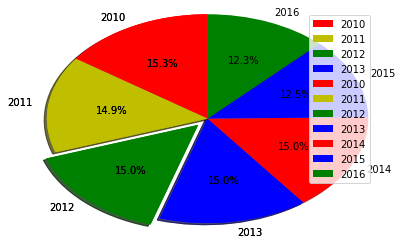

In [103]:
# With suitable visualization show the oil reserves of India from 2010 to 2016.
import matplotlib.pyplot as plt
import numpy as np

df1 = oilre.loc[oilre['Country/ Region'] == "India"]
df2 = df1.loc[:,'2010':'2016'].values
list=[]
a = np.array(df2).tolist()
for i in a:
    list.append(i)
print(list )
# plt.pie(list,startangle=90, shadow = True,radius = 1.2, autopct = '%1.1f%%')
# plt.show()


import matplotlib.pyplot as plt 
  
# defining labels 
activities = ['2010', '2011', '2012','2013', '2014', '2015', '2016'] 
  
# portion covered by each label 
slices = [5.832999999999999,5.704,5.72,5.711,5.742999999999999,4.7860000000000005,4.677]
  
# color for each label 
colors = ['r', 'y', 'g', 'b','r','b','g'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0,0,0,0), 
        radius = 1.2, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 


In [61]:
# List the countries having maximum oil reserves in each region

df1 = oilre.iloc[:,-3:]
df1['mean'] = df1.mean(axis=1)

df2 = oilre[['Region','Country/ Region']]
result = pd.merge(df1, oilre, on='2014')
result[result["mean"] == result["mean"].max()][['Region','mean']]

,Region,mean
9,S. & Cent. America,300.603


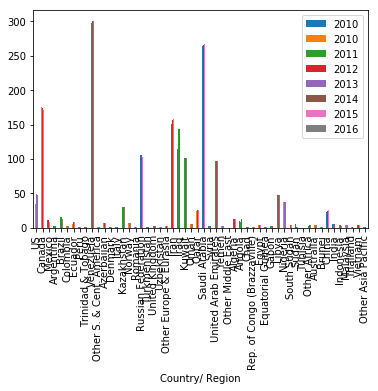

In [72]:
# Draw suitable visualization which shows the share of oil reserves by each region.
oilre.set_index('Country/ Region')[['2010', '2010','2011','2012','2013','2014','2015','2016']].plot.bar()
plt.show()

In [97]:
# Find the world’s top 5 countries having maximum oil reserves in the 2015. Show their % of share in total oil reserve for the same year.
df1 = oilre.groupby(['Region'], sort=False)['2015'].max()
df1.head()

Region
North America         171.512
S. & Cent. America    300.878
Europe & Eurasia      102.375
Middle East           266.578
Africa                 48.363
Name: 2015, dtype: float64

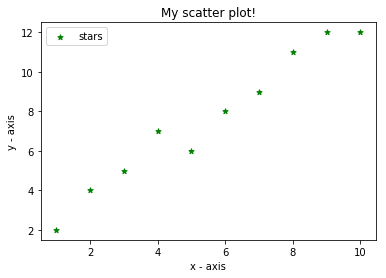

In [98]:
# Draw any type of visualizations you know.
x = [1,2,3,4,5,6,7,8,9,10] 
y = [2,4,5,7,6,8,9,11,12,12] 
  
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title('My scatter plot!') 
plt.legend() 
plt.show() 


In [107]:
milk = pd.read_csv('milk_production(1).csv')
milk = milk.applymap(lambda x: x.strip() if isinstance(x,str) else x)
milk.head()

,Category,State/ UT Name,Cow Milk-2010-11,Cow Milk-2011-12,Cow Milk-2013-14,Cow Milk-2014-15,Cow Milk-2015-16,Boffalo Milk-2010-11,Boffalo Milk-2011-12,Boffalo Milk-2013-14,Boffalo Milk-2014-15,Boffalo Milk-2015-16,Goat Milk-2010-11,Goat Milk-2011-12,Goat Milk-2013-14,Goat Milk-2014-15,Goat Milk-2015-16
0,State,Andhra Pradesh,3102.0,3377.0,3799.0,3079,3369,8101.0,8710.0,9207.0,6574,7445,1.0,1.0,1.0,3,3
1,State,Arunachal Pradesh,28.0,22.0,43.0,46,50,NaN,NaN,0.0,0,0,NaN,NaN,NaN,0,0
2,State,Assam,666.0,658.0,677.0,685,703,101.0,117.0,122.0,120,117,23.0,22.0,15.0,24,24
3,State,Bihar,3561.0,3661.0,3986.0,4318,4881,2798.0,2805.0,3015.0,3248,3210,158.0,177.0,196.0,209,198
4,State,Chhattisgarh,644.0,701.0,788.0,824,919,343.0,368.0,374.0,359,311,43.0,49.0,46.0,49,48


In [124]:
# Which state has produced max milk in year 2013-14?

dfm = milk[['Cow Milk-2013-14','Boffalo Milk-2013-14','Goat Milk-2013-14']]
dfm.fillna(0)
milk['sum'] = dfm.sum(axis=1)
milk[milk["sum"] == milk["sum"].max()][["State/ UT Name"]]

,State/ UT Name
26,Uttar Pradesh


In [139]:
# List top 5 milk producing states in each year from 2010 to 2015

dfm = milk.iloc[:,2:]
dfm.fillna(0)
dfm['sum'] = dfm.sum(axis=1)
result = pd.merge(dfm, milk, on='Cow Milk-2013-14')
result.sort_values("sum_y", axis = 0, ascending = False)[['State/ UT Name']].head()

,State/ UT Name
31,Uttar Pradesh
23,Rajasthan
0,Andhra Pradesh
8,Gujarat
22,Punjab


In [150]:
# Calculate average milk production by cow, buffalo and goat in each year for selected state.
dfr = milk.loc[milk['State/ UT Name'] == "Rajasthan"]
dfmm = dfr.iloc[:,2:]
dfmm.fillna(0)
dfmm.mean(axis=0)

Cow Milk-2010-11         5032.0
Cow Milk-2011-12         4972.0
Cow Milk-2013-14         5112.0
Cow Milk-2014-15         6126.0
Cow Milk-2015-16         6630.0
Boffalo Milk-2010-11     6611.0
Boffalo Milk-2011-12     6901.0
Boffalo Milk-2013-14     7681.0
Boffalo Milk-2014-15     8985.0
Boffalo Milk-2015-16     9937.0
Goat Milk-2010-11        1590.0
Goat Milk-2011-12        1641.0
Goat Milk-2013-14        1780.0
Goat Milk-2014-15        1823.0
Goat Milk-2015-16        1933.0
sum                     14573.0
dtype: float64

In [ ]:
# List 5 states (if present) whose total milk production is increased for last three years.



In [155]:
# Draw line graph showing total milk production for last 5 years of selected state

dfr = milk.loc[milk['State/ UT Name'] == "Rajasthan"]
dfmm = dfr.iloc[:,2:].values
dfmm
x = [5032.,   4972.,   5112.,   6126.,   6630.,   6611.,   6901.,7681.,   8985.,   9937.,   1590.,   1641.,   1780.,   1823.,1933.,  14573.]


array([[  5032.,   4972.,   5112.,   6126.,   6630.,   6611.,   6901.,
          7681.,   8985.,   9937.,   1590.,   1641.,   1780.,   1823.,
          1933.,  14573.]])